In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv("Housing.csv")

In [4]:
df.head(12)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.duplicated().value_counts()

False    545
Name: count, dtype: int64

In [8]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [9]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

le=LabelEncoder()

for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])
df = df.drop(columns=categorical_cols)

df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded
0,13300000,7420,4,2,3,2,furnished,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,furnished,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,semi-furnished,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,furnished,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,semi-furnished,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,unfurnished,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,furnished,0,0,0,0,0,0


In [12]:
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True,dtype=int)

In [13]:
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [14]:
corr_matrix = df_encoded.corr()
print(corr_matrix['price'].sort_values(ascending=False))
# df_encoded.corr()

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_encoded            0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_encoded                   0.329777
mainroad_encoded                   0.296898
guestroom_encoded                  0.255517
basement_encoded                   0.187057
hotwaterheating_encoded            0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


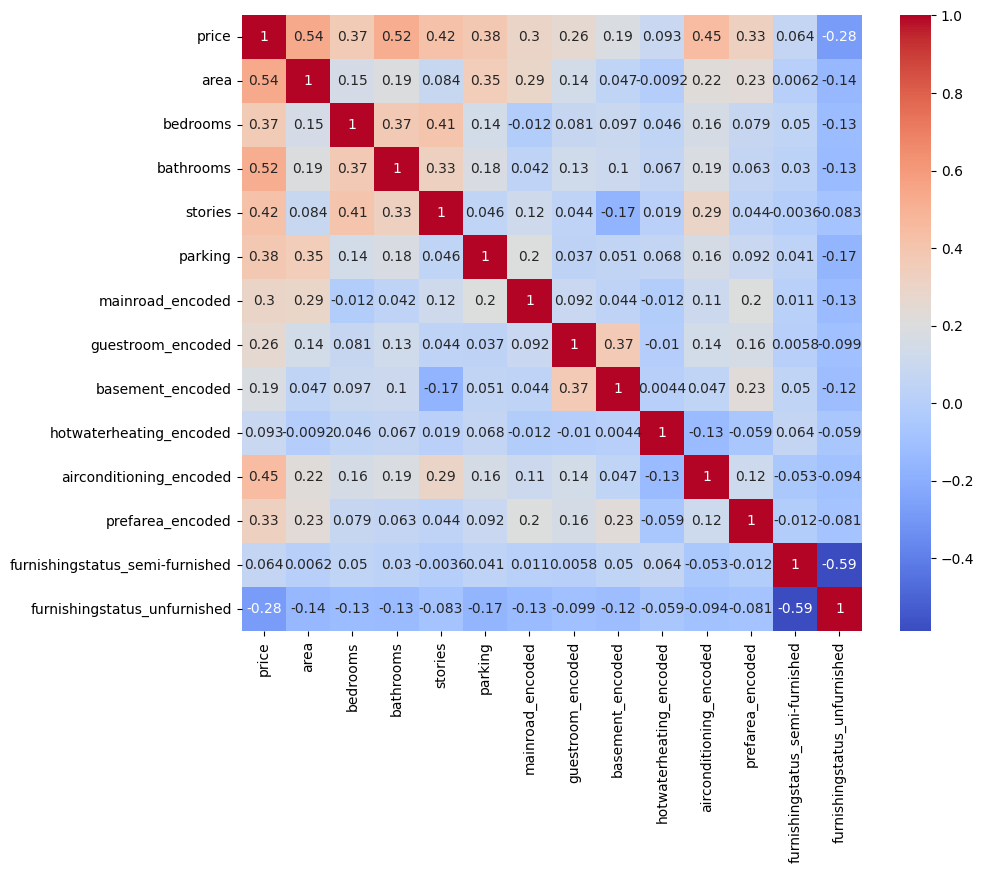

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
print(corr_matrix[['bedrooms','bathrooms','area','stories']])


                                 bedrooms  bathrooms      area   stories
price                            0.366494   0.517545  0.535997  0.420712
area                             0.151858   0.193820  1.000000  0.083996
bedrooms                         1.000000   0.373930  0.151858  0.408564
bathrooms                        0.373930   1.000000  0.193820  0.326165
stories                          0.408564   0.326165  0.083996  1.000000
parking                          0.139270   0.177496  0.352980  0.045547
mainroad_encoded                -0.012033   0.042398  0.288874  0.121706
guestroom_encoded                0.080549   0.126469  0.140297  0.043538
basement_encoded                 0.097312   0.102106  0.047417 -0.172394
hotwaterheating_encoded          0.046049   0.067159 -0.009229  0.018847
airconditioning_encoded          0.160603   0.186915  0.222393  0.293602
prefarea_encoded                 0.079023   0.063472  0.234779  0.044425
furnishingstatus_semi-furnished  0.050040   0.02983

In [17]:
# Combine rooms
df_encoded['total_rooms'] = df_encoded['bedrooms'] + df_encoded['bathrooms']

# Area per room
df_encoded['area_per_room'] = df_encoded['area'] / df_encoded['total_rooms']

# Stories multiplied by area
df_encoded['stories_area'] = df_encoded['area'] * df_encoded['stories']

# Guestroom + basement
df_encoded['has_guest_basement'] = df_encoded['guestroom_encoded'] + df_encoded['basement_encoded']

# Count of amenities
df_encoded['amenities_count'] = df_encoded['airconditioning_encoded'] + df_encoded['hotwaterheating_encoded'] + df_encoded['prefarea_encoded'] + df_encoded['mainroad_encoded']


In [18]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']




In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['area_scaled'] = scaler.fit_transform(X_train[['area']])
X_test['area_scaled'] = scaler.transform(X_test[['area']])

In [21]:
# Drop original 'area'
X_train.drop(columns=['area'], inplace=True)
X_test.drop(columns=['area'], inplace=True)

In [22]:
X_train

,bedrooms,bathrooms,stories,parking,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,total_rooms,area_per_room,stories_area,has_guest_basement,amenities_count,area_scaled
46,3,2,4,1,1,0,0,0,1,0,0,0,5,1200.000000,24000,0,2,0.384168
93,3,2,1,3,1,0,1,0,1,0,1,0,5,1440.000000,7200,1,2,0.929181
335,2,1,1,2,1,0,1,0,1,0,0,0,3,1272.000000,3816,1,2,-0.607755
412,3,1,2,0,1,0,1,0,0,1,0,1,4,652.500000,5220,1,2,-1.155492
471,3,1,2,0,1,0,0,0,0,0,0,1,4,937.500000,7500,0,1,-0.637730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4,2,4,0,1,0,0,0,1,0,0,1,6,1000.000000,24000,0,2,0.384168
106,4,2,1,0,1,0,1,0,1,1,1,0,6,908.333333,5450,1,3,0.134371
270,3,2,3,1,1,0,0,1,0,0,0,0,5,900.000000,13500,0,2,-0.297097
435,2,1,1,0,1,0,0,0,0,0,0,1,3,1346.666667,4040,0,1,-0.506019


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 962959.3640365702
MSE: 1719526096259.1155
R²: 0.6598076567444074


In [25]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                            Feature    Coefficient
17                  amenities_count  720541.499227
1                          bedrooms  619802.468102
16               has_guest_basement  505261.192869
8           hotwaterheating_encoded  288363.764915
12     furnishingstatus_unfurnished  263944.292075
7                  basement_encoded  223923.666969
3                           stories  220214.177048
6                 guestroom_encoded  207104.022886
15                     stories_area  199690.004502
2                         bathrooms  150549.519636
9           airconditioning_encoded  118998.026332
14                    area_per_room      41.169293
13                      total_rooms    -647.663924
5                  mainroad_encoded   -7414.018384
10                 prefarea_encoded -119596.563196
4                           parking -126024.265347
0                              area -355858.176027
11  furnishingstatus_semi-furnished -432298.268930


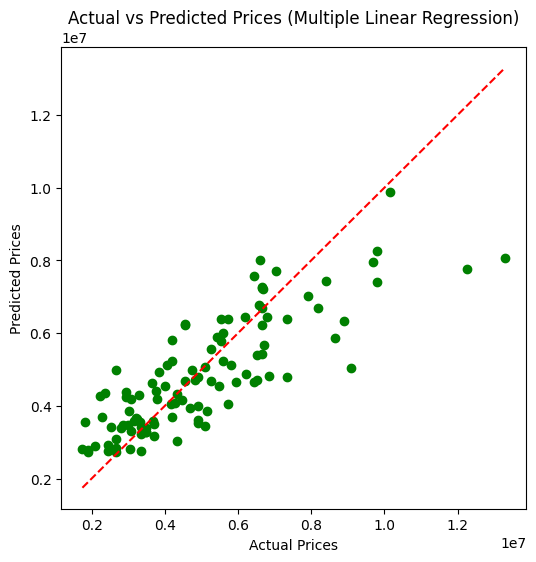

In [26]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Multiple Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()


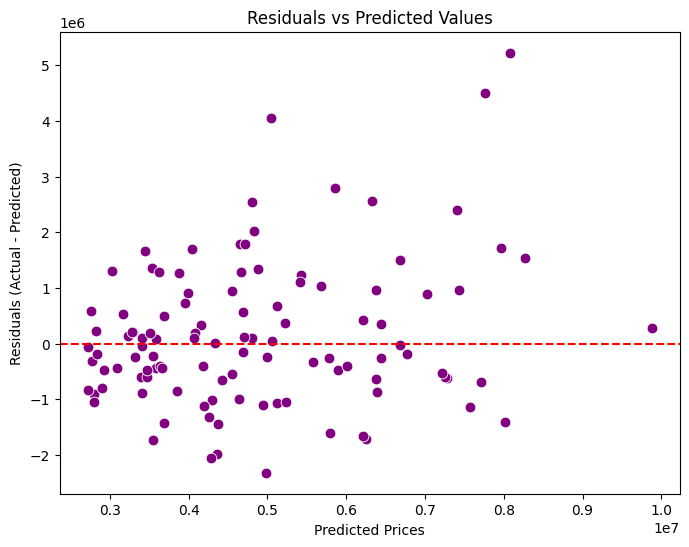

In [27]:
# Calculate residuals
residuals = y_test - y_pred
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', s=60)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted Values')
plt.show()


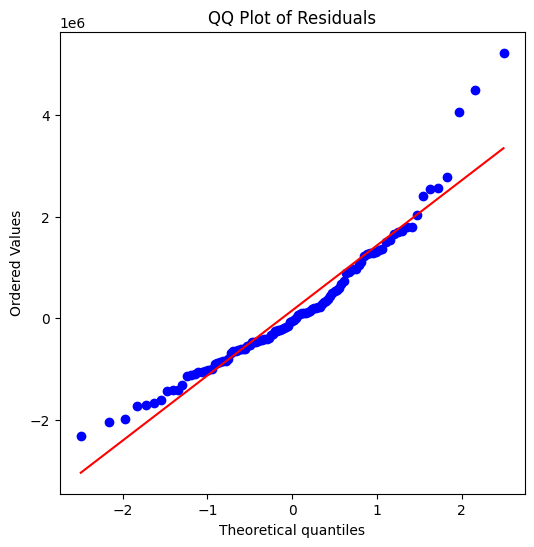

In [28]:
import scipy.stats as stats
#  QQ Plot (for normality check)
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()